# **Air Quality Index:  Exploratory Data Analysis and Visualization**

Performed by:


1.   Rahul Mallya - PES1UG20CS318
2.   Rohit Roshan - PES1UG20CS355
3.   Rohith Reddy - PES1UG20CS354





After conducting our survey of the literature, what we have understood till now is how Air quality affects nature and human health and also one of the major causes of global warming.Our study focuses on various factors affecting Air Quality Index (AQI), which estimates the amount of contaminated air present in the various states and cities of India..

Short and long term exposure to  various pollutants that we are working with can lead to a wide range of diseases, including stroke, chronic obstructive pulmonary disease, trachea, bronchus and lung cancers, aggravated asthma and lower respiratory infections.

Air pollution can damage crops and trees in a variety of ways. Ground-level ozone can lead to reductions in agricultural crop and commercial forest yields, acid rain, eutrophication, reduced growth and survivability of tree seedlings, and increased plant susceptibility to disease, pests and other environmental stresses.

People in the future would want to live in places with better Air Quality and would want the earth as a whole to have cleaner air.

Our goal at the end of this project is to apply various machine learning models to predict the quality of air at different places in India.

With our literature survey, we have learned the different approaches that people have taken around the world  to solve this problem which we aim to implement in our country.

We also wish to use our predictions to bring awareness among people how  changes in their lifestyle can help reduce air pollution for the current and future generations.

##  Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

## Dataset Summary <a id='dataset_summary'></a>

### Statistical analysis of given dataset

#### The following table shows the first five rows of the given dataset, thereby giving us insight about what sort of dataset it is. And what are the attributes included in the dataset.

In [ ]:
dataset=pd.read_csv('/work/data.csv',encoding="ISO-8859-1")
dataset.head()


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


The dataset consists primarily 5 different types pollutants measured over the years in different states and cities of India. *rspm, spm* and *pm2_5* are suspended air pollutants whereas *SO2* and *NO2* are harmful gaseous emmissions.

In [ ]:
dataset.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


We can observe that the max values are farther away from the central tendency for all of the columns in the dataset. Thus, we infer the presence of outliers in all the columns in the dataset.

### Information about each column and about null values for each column

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [ ]:
dataset.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

We can observe that there are lots of null values, especially in stn_code and agency. These two columns dont add much value to our analysis. Hence, both of which will not be included in further analysis.


Focusing on the categorical variables, we are left with location_monitoring_station which consists of considerable nulls (approximately 27000). It would have been useful to have those values for an in depth analysis, but for now we will keep it out because of the null values and come back later if needed.

As for the two dates columns, immediate attention goes into the sampling date which has different formats within, highlighting some data input issues.

While, it is important to have this metric, it would be more useful to go back to the origin of the dataset and ask relevant questions such as to why are there different formats? Is it a human error or error due to incorporating different formats. For now, we will keep it out and only have the date column.

#   1.2 Dataset Cleaning 

### From the above inference, we choose to drop station code, agency, sampling_date, and location monitoring station.

### Following tables gives information about new dataset after dropping of unneccessary columns

In [ ]:
dataset.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True)
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435739 non-null  object 
 2   type      430349 non-null  object 
 3   so2       401096 non-null  float64
 4   no2       419509 non-null  float64
 5   rspm      395520 non-null  float64
 6   spm       198355 non-null  float64
 7   pm2_5     9314 non-null    float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


Now that we know that our dataset has missing values, we need to find the columns which has those values alongwith, the percentage effect it has with respect to whole dataset.

#### Following table gives us the number of missing values for each column and the percentage of null values it has with respect to the dataset

In [ ]:
total = dataset.isnull().sum()[dataset.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(dataset)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
pm2_5,426428,97.86
spm,237387,54.48
rspm,40222,9.23
so2,34646,7.95
no2,16233,3.73
type,5393,1.24
date,7,0.00
location,3,0.00


#### Since we don't have any much idea about how the data is distributed, and what to take as a measure of central tendency ,it would be advisable to remove outliers. Outliers has a huge effect on mean but not much of an effect on mode and median. Since we usually measure mean as the measure of central tendency, we will be removing any outliers from the dataset for the important columns

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    #return df_out

remove_outlier(dataset,'so2')
remove_outlier(dataset,'no2')
remove_outlier(dataset,'rspm')
remove_outlier(dataset,'spm')

#### Following table gives statewise distribution of all the major pollutants i.e so2, no2, rspm, spm, pm2_5

In [ ]:
dataset.groupby('state')[['spm','pm2_5','rspm','so2','no2']].mean()

,spm,pm2_5,rspm,so2,no2
state,,,,,
Andhra Pradesh,200.260378,NaN,78.182824,7.284845,21.704451
Arunachal Pradesh,NaN,NaN,76.629213,3.179104,5.469697
Assam,153.355386,NaN,93.724912,6.723263,14.793691
Bihar,276.917416,NaN,123.705176,19.381476,36.575525
Chandigarh,206.056150,NaN,96.587079,2.676986,18.619404
Chhattisgarh,231.290969,NaN,126.472399,12.846609,24.815961
Dadra & Nagar Haveli,170.545024,30.511628,76.536530,8.939587,18.293959
Daman & Diu,145.681416,27.886364,73.749431,8.192958,16.168926
Delhi,399.402088,95.113208,196.639771,8.737273,53.489147


### Filling all the missing values with the mean

Since we already know that our dataset contains missing values , and we need to fill them for our further analysis . We will be using Imputation to fill inour missing values. Imputation is the process of replacing missing data with substituted values to avoid pitfalls involved with cases that have missing values. 

Here, will be imputing the missing values with the mean value of the particular attribute for that state.

In [ ]:
by_State=dataset.groupby('state')

def impute_mean(series):
    return series.fillna(series.mean())

dataset['rspm']=by_State['rspm'].transform(impute_mean)
dataset['so2']=by_State['so2'].transform(impute_mean)
dataset['no2']=by_State['no2'].transform(impute_mean)
dataset['spm']=by_State['spm'].transform(impute_mean)
dataset['pm2_5']=by_State['pm2_5'].transform(impute_mean)

#### Understanding the pollutants briefly .

NO2: Nitrogen Dioxide and is emmitted mostly from combustion from power sources or transport.

SO2: Sulphur Dioxide and is emmitted mostly from coal burning, oil burning, manufacturing of Sulphuric acid.

SPM: Suspended particulate matter and are known to be the deadliest form of air pollution. They are microscopic in nature and are found to be suspended in earth's atmosphere.

RSPM: Respirable suspended particulate matter. A sub form of spm and are respnsible for respiratory diseases.

pm2_5: Suspended particulate matter with diameters less than 2.5 micrometres. They tend to remain suspended for longer durations and potentially very harmful.



## NULL value impution for categorical data

### We will be imputing the null values in categorical data with their respective modes.

In [ ]:
dataset['location']=dataset['location'].fillna(dataset['location'].mode()[0])
dataset['type']=dataset['type'].fillna(dataset['type'].mode()[0])

In [ ]:
dataset['type'].value_counts()

Residential, Rural and other Areas    184407
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

#### It is also obsereved that similar type of locations have been grouped seperately. Hence, we group all of them into 4 categories for easier understanding

In [ ]:
dataset['type'].replace('Residential, Rural and other Areas','Residential',inplace = True)
dataset['type'].replace('Residential and others','Residential',inplace = True)
dataset['type'].replace('Industrial Areas','Industrial',inplace = True)
dataset['type'].replace('Industrial Area','Industrial',inplace = True)
dataset['type'].replace('Sensitive Area','Sensitive',inplace = True)
dataset['type'].replace('Sensitive Areas','Sensitive',inplace = True)
dataset['type'].value_counts()

Residential    271356
Industrial     148071
Sensitive       15011
RIRUO            1304
Name: type, dtype: int64

In [ ]:
dataset.isnull().sum()

state            0
location         0
type             0
so2              3
no2              3
rspm             3
spm           4071
pm2_5       312053
date             7
dtype: int64

Correlation Analysis

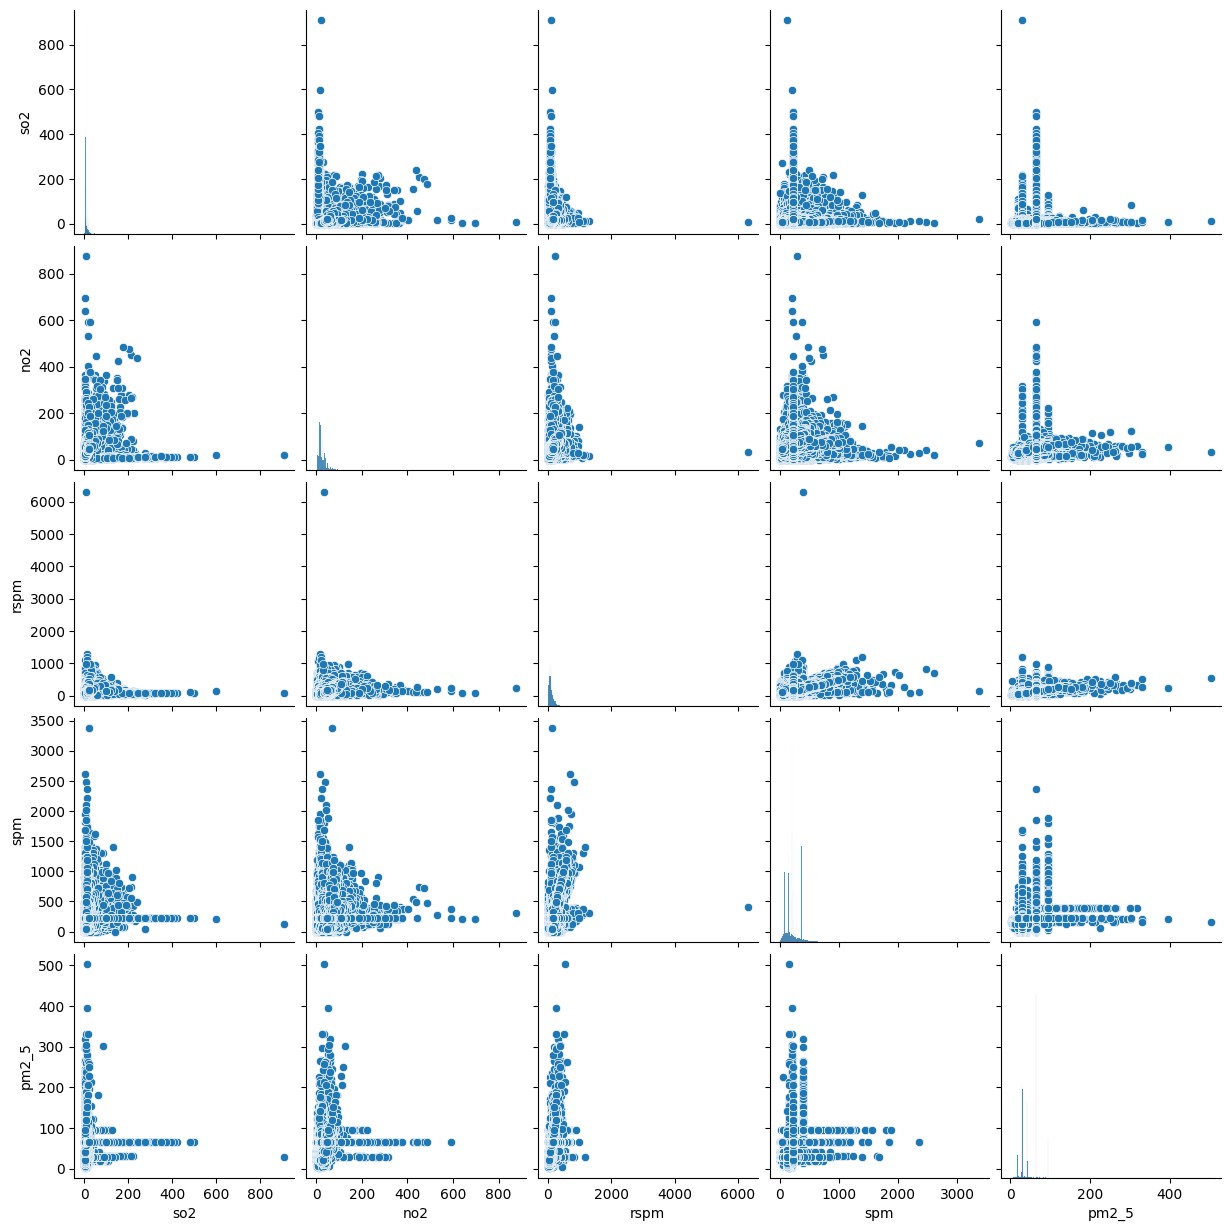

In [ ]:
sns.pairplot(data=dataset)

### Derivation for Individual Pollutant Index and AQI

The AQI is an index for reporting daily air quality. It tells you how clean or polluted your air is, and what associated health effects might be a concern for you. The AQI focuses on health effects you may experience within a few hours or days after breathing polluted air. EPA
calculates the AQI for five major air pollutants regulated by the Clean Air Act: groundlevel ozone, particle pollution Air quality directly affects (also known as particulate our quality of life. matter), carbon monoxide, sulfur dioxide, and nitrogen dioxide. For each of these
pollutants, EPA has established national air quality standards to protect public health.

AQI is calculated on the range of 0-500, we are scaling the values according to the AQI calculation formula


\begin{equation*}
AQI = AQI_{min} +  \frac{PM_{Obs}-PM_{Min}}{AQI_{Max}-AQI_{Min}}{(PM_{Max}-PM_{Min})}
\end{equation*}

#### Function to calculate so2 individual pollutant index(si)
The index category for SO2 is scaled between 0-1600. So on applying formula which is used to calculate AQI

In [ ]:
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
dataset['si']=dataset['so2'].apply(calculate_si)
df= dataset[['so2','si']]
df.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


#### Function to calculate no2 individual pollutant index(ni)
The index category for NO2 is scaled between 0-400. So on applying formula which is used to calculate AQI

In [ ]:
#Function to calculate no2 individual pollutant index(ni)
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
dataset['ni']=dataset['no2'].apply(calculate_ni)
df= dataset[['no2','ni']]
df.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


#### Function to calculate rspm individual pollutant index(rpi)
The index category for rspm is scaled between 0-400. So on applying formula which is used to calculate AQI

In [ ]:
#Function to calculate rspm individual pollutant index(rpi)
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
dataset['rpi']=dataset['rspm'].apply(calculate_si)
df= dataset[['rspm','rpi']]
df.head()
#df.tail()

,rspm,rpi
0,78.182824,97.72853
1,78.182824,97.72853
2,78.182824,97.72853
3,78.182824,97.72853
4,78.182824,97.72853


#### Function to calculate spm individual pollutant index(spi)
The index category for rspm is scaled between 0-430. So on applying formula which is used to calculate AQI

In [ ]:
#Function to calculate spm individual pollutant index(spi)
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
dataset['spi']=dataset['spm'].apply(calculate_spi)
df= dataset[['spm','spi']]
df.head()


,spm,spi
0,200.260378,166.840252
1,200.260378,166.840252
2,200.260378,166.840252
3,200.260378,166.840252
4,200.260378,166.840252


#### Function to calculate pm2_5 individual pollutant index(pmi)
The index category for rspm is scaled between 0-430. So on applying formula which is used to calculate AQI

In [ ]:
#Function to calculate pm2_5 individual pollutant index(pmi)
def calculate_pmi(pm2_5):
    pmi=0
    if(pm2_5<=50):
     pmi=pm2_5*(50/50)
    elif(pm2_5>50 and pm2_5<=100):
     pmi=50+(pm2_5-50)*(50/50)
    elif(pm2_5>100 and pm2_5<=250):
     pmi= 100+(pm2_5-100)*(100/150)
    elif(pm2_5>250 and pm2_5<=350):
     pmi=200+(pm2_5-250)*(100/100)
    elif(pm2_5>350 and pm2_5<=450):
     pmi=300+(pm2_5-350)*(100/100)
    else:
     pmi=400+(pm2_5-430)*(100/80)
    return pmi
dataset['pmi']=dataset['pm2_5'].apply(calculate_pmi)
df= dataset[['pm2_5','pmi']]


#### Function to calculate the air quality index (AQI) of every data value its is calculated as per indian govt standards
The purpose of the AQI is to help you understand what
local air quality means to your health. Also it is scaled from 0 to 500.

In [ ]:
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi
dataset['AQI']=dataset.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df= dataset[['state','si','ni','rpi','spi','AQI']]
df.head()

,state,si,ni,rpi,spi,AQI
0,Andhra Pradesh,6.000,21.750,97.72853,166.840252,166.840252
1,Andhra Pradesh,3.875,8.750,97.72853,166.840252,166.840252
2,Andhra Pradesh,7.750,35.625,97.72853,166.840252,166.840252
3,Andhra Pradesh,7.875,18.375,97.72853,166.840252,166.840252
4,Andhra Pradesh,5.875,9.375,97.72853,166.840252,166.840252


Now that we have a definitive dataset, that is one without null values we can employ various machine learning algorithms to see* *how are dependent and independent variable are related. And also to do Exploratory Data Analysis on the given dataset.

# 1.3 Exploratory Data Analysis

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

### Graph Overview:- Visualization of AQI across india (Year-wise)

<AxesSubplot: xlabel='year', ylabel='AQI'>

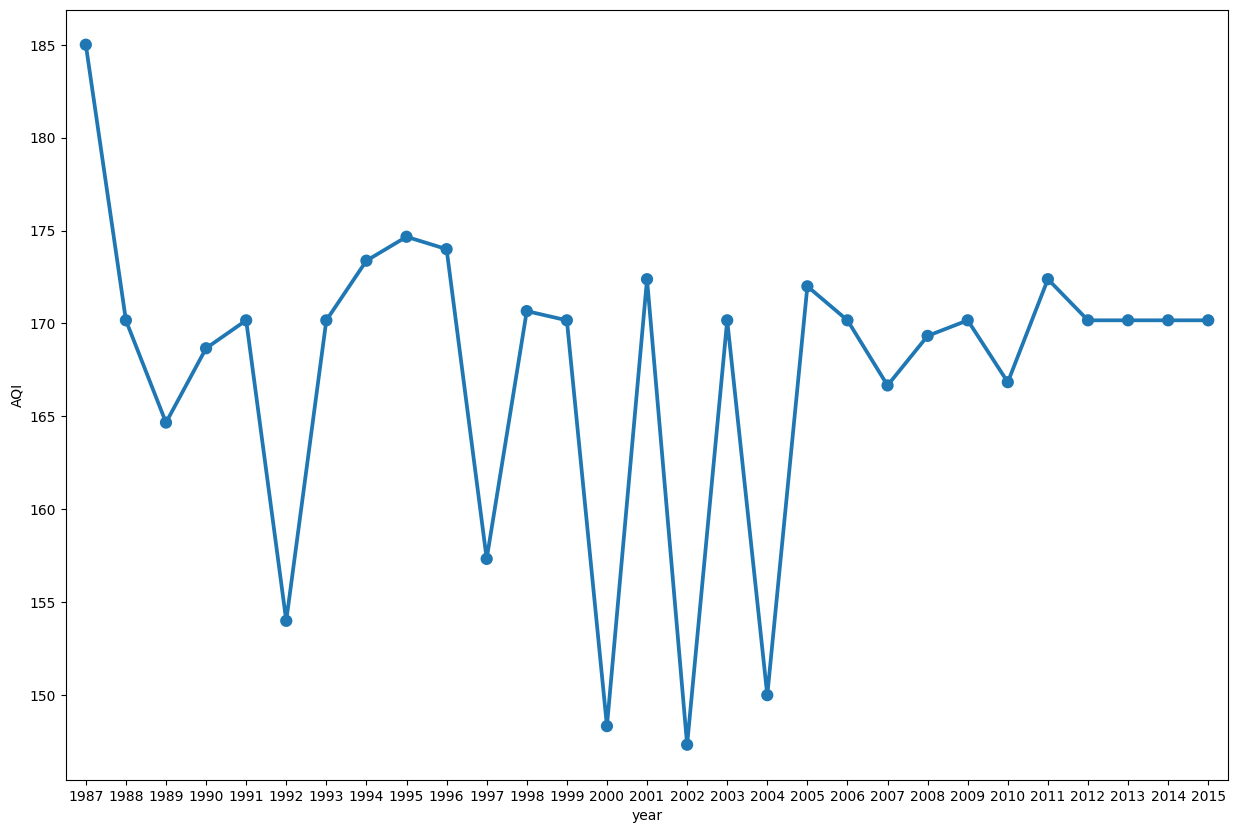

In [ ]:
#Visualization of AQI across india 

dataset['date'] = pd.to_datetime(dataset['date'],format='%Y-%m-%d') # date parse
dataset['year'] = dataset['date'].dt.year # year
dataset['year'] = dataset['year'].fillna(0.0).astype(int)
dataset = dataset[(dataset['year']>0)]

df = dataset[['AQI','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='year', y='AQI', data=df)

We could notice a decrease in AQI from 1978 to 1992, followed by irregular trends from 1995 to 2005. A relatively constant trend is observed in the last 10 years of the dataset.

### Pollutants affecting Air Quality Index v/s Date 

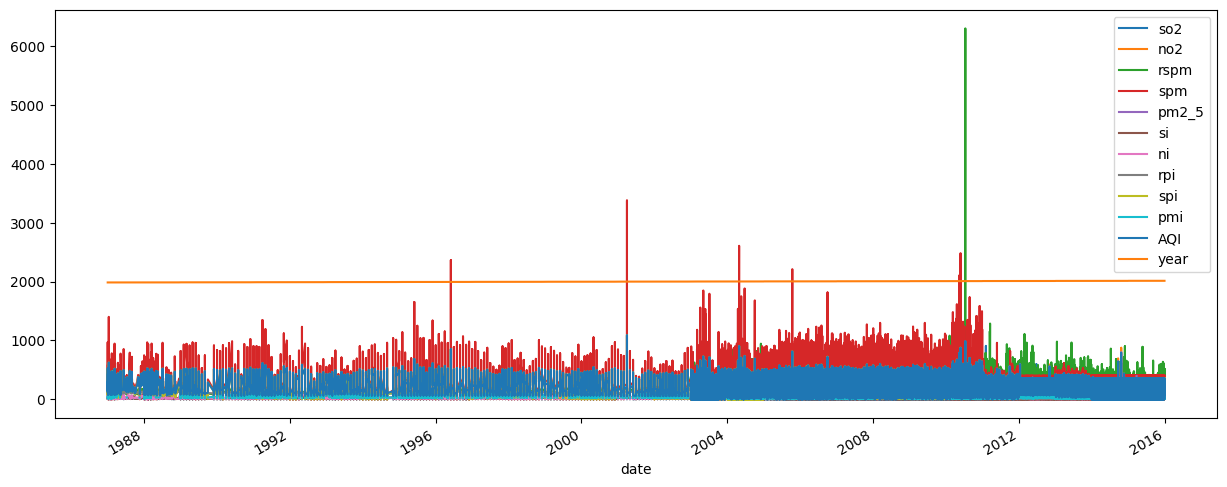

In [ ]:
df=dataset.set_index('date')
df.sort_values(by='date',ascending=False)
df.plot(figsize=(15, 6))
plt.show()
y=df.AQI

We can notice similar trends in so2 and spm values, and gradual increase in all the polutuants over the years.

### Table Overview:- Exploring air pollution state-wise 

In [ ]:
#Exploring air pollution state-wise
dataset.fillna(0.0,inplace=True)
states=dataset.groupby(['state','location'],as_index=False).mean()
state=states.groupby(['state'],as_index=False).mean()
state

,state,so2,no2,rspm,spm,pm2_5,si,ni,rpi,spi,pmi,AQI,year
0,Andhra Pradesh,7.005150,17.705235,73.718197,197.085630,0.000000,8.740983,22.091476,84.591479,165.285154,0.000000,165.901863,2011.649547
1,Arunachal Pradesh,3.179104,5.469697,76.629213,0.000000,0.000000,3.973881,6.837121,84.939295,0.000000,0.000000,0.000000,2014.666667
2,Assam,6.297072,14.122107,79.860142,141.421396,0.000000,7.871341,17.652233,81.545275,126.050825,0.000000,126.577559,2011.302031
3,Bihar,33.321814,42.324845,123.705176,281.948937,0.000000,40.939075,52.833105,113.740949,233.301398,0.000000,234.617619,1997.542211
4,Chandigarh,2.676986,18.619404,96.587079,206.056150,0.000000,3.346232,23.271826,96.646110,174.128162,0.000000,174.262893,2009.221831
5,Chhattisgarh,11.964182,25.336867,127.909085,233.774753,0.000000,14.955227,31.670710,114.758968,192.639060,0.000000,192.897348,2010.187112
6,Dadra & Nagar Haveli,8.037770,15.451606,76.720537,149.020211,30.511628,10.047213,19.314507,91.353542,132.029920,30.511628,138.964052,2004.342285
7,Daman & Diu,7.339134,12.615693,73.749431,127.996169,27.886364,9.173918,15.769616,89.039467,114.877290,27.886364,124.524897,2000.611876
8,Delhi,8.737273,53.489147,196.639771,399.402088,95.113208,10.908845,65.928540,136.469616,332.640733,94.889452,332.829348,2006.803415
9,Goa,7.424731,11.790294,59.443098,57.524474,18.995716,9.254478,14.737801,69.158024,56.055605,18.984334,79.622941,2011.932261


### Comparing values of so2 and no2 over the years

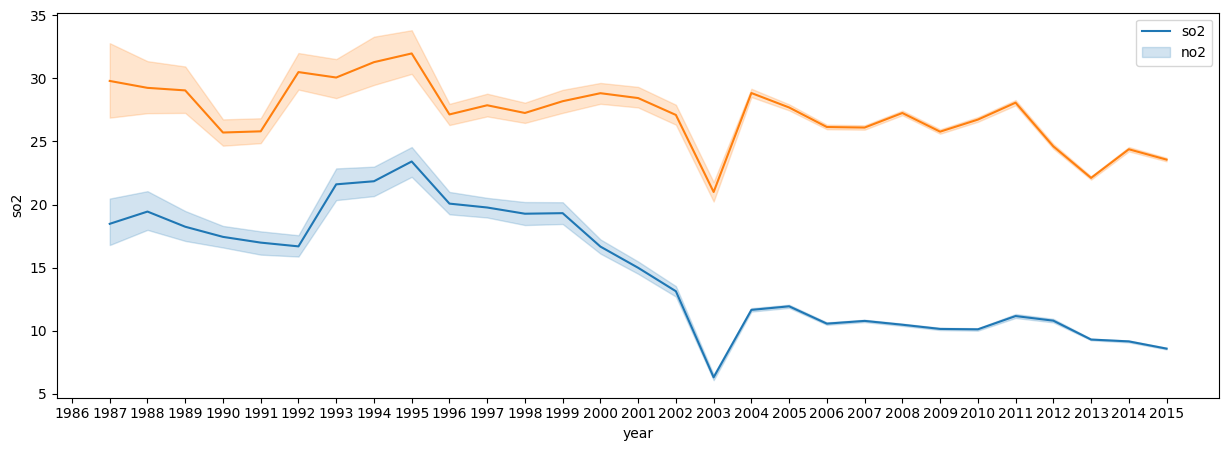

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(np.arange(1980,2016))
sns.lineplot(x='year',y='so2',data=dataset)
sns.lineplot(x='year',y='no2',data=dataset)
plt.legend(['so2','no2'])

The patterns for both, the so2 as well as the no2 values are observed to be similar through the years, with both of them spiking up from 1991 to 1992 and dipping in 2003.

<AxesSubplot: title={'center': 'States & Pollutant Levels'}, xlabel='state'>

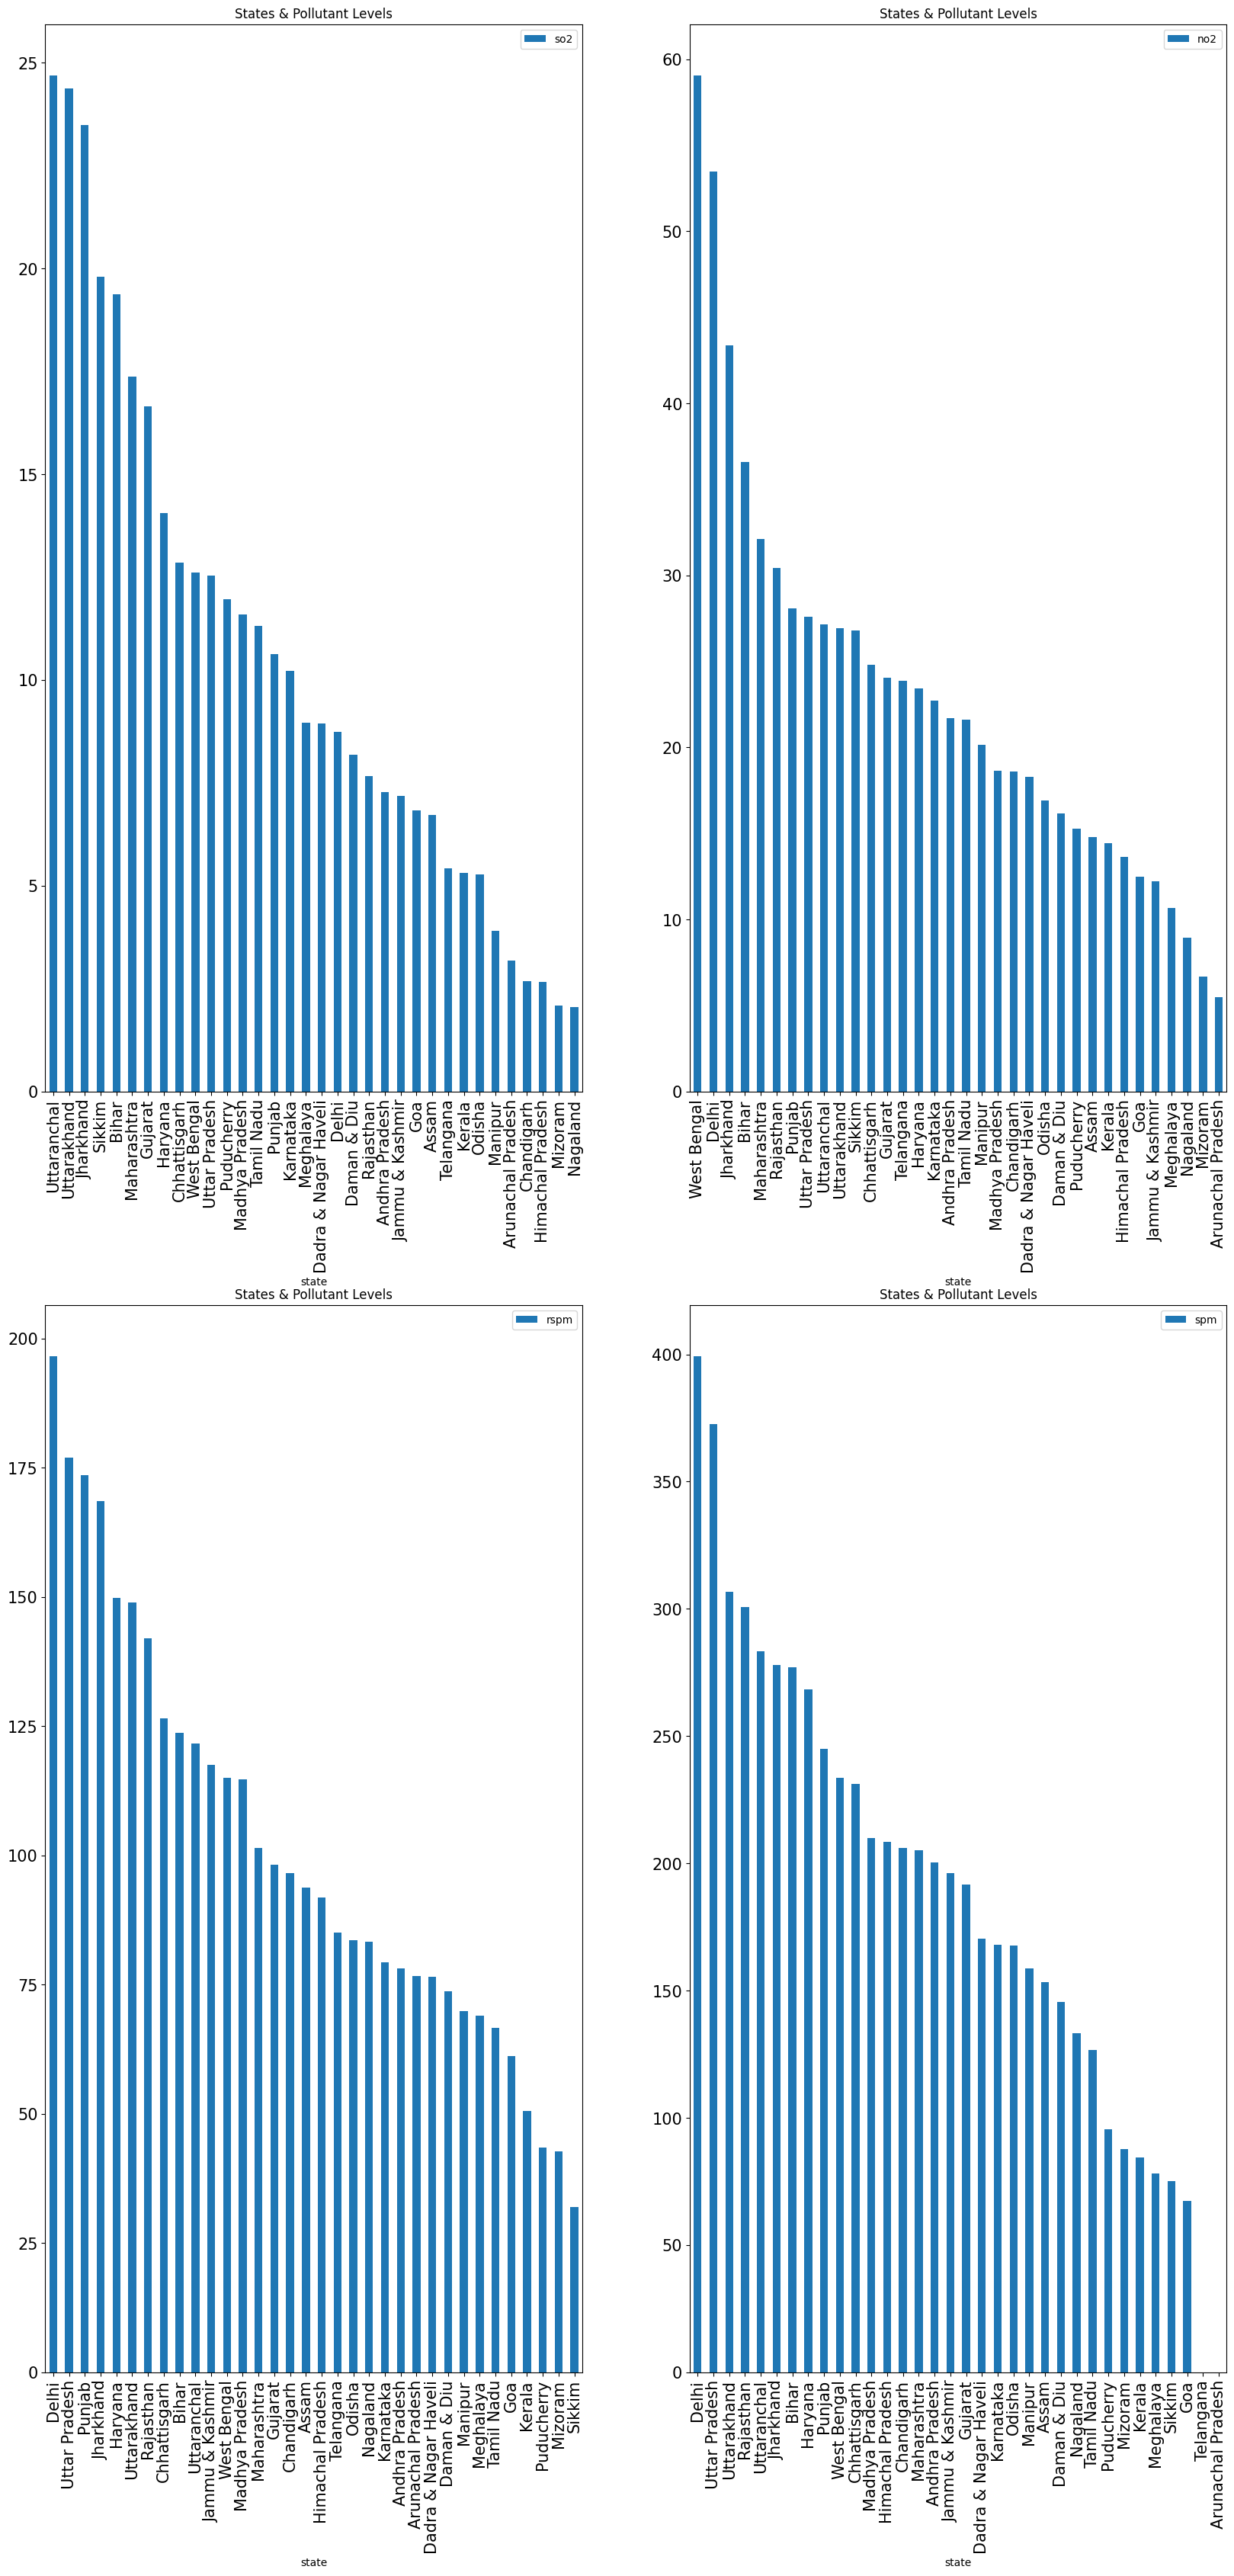

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(40,40))

state_pollution = dataset[['state','so2']].groupby('state').mean()
state_pollution.reset_index(inplace = True)
state_pollution.sort_values('so2', ascending= False, inplace = True)
state_pollution.plot(kind = 'bar', figsize= (20,10), x = 'state', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[0][0])

state_pollution_no2 = dataset[['state','no2']].groupby('state').mean()
state_pollution_no2.reset_index(inplace = True)
state_pollution_no2.sort_values('no2', ascending= False, inplace = True)
state_pollution_no2.plot(kind = 'bar', figsize= (20,10), x = 'state', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[0][1])

state_pollution_rspm = dataset[['state','rspm']].groupby('state').mean()
state_pollution_rspm.reset_index(inplace = True)
state_pollution_rspm.sort_values('rspm', ascending= False, inplace = True)
state_pollution_rspm.plot(kind = 'bar', figsize= (20,40), x = 'state', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[1][0])


state_pollution_spm = dataset[['state','spm']].groupby('state').mean()
state_pollution_spm.reset_index(inplace = True)
state_pollution_spm.sort_values('spm', ascending= False, inplace = True)
state_pollution_spm.plot(kind = 'bar', figsize= (20,40), x = 'state', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[1][1])



### Frequencies of data from different states

[]

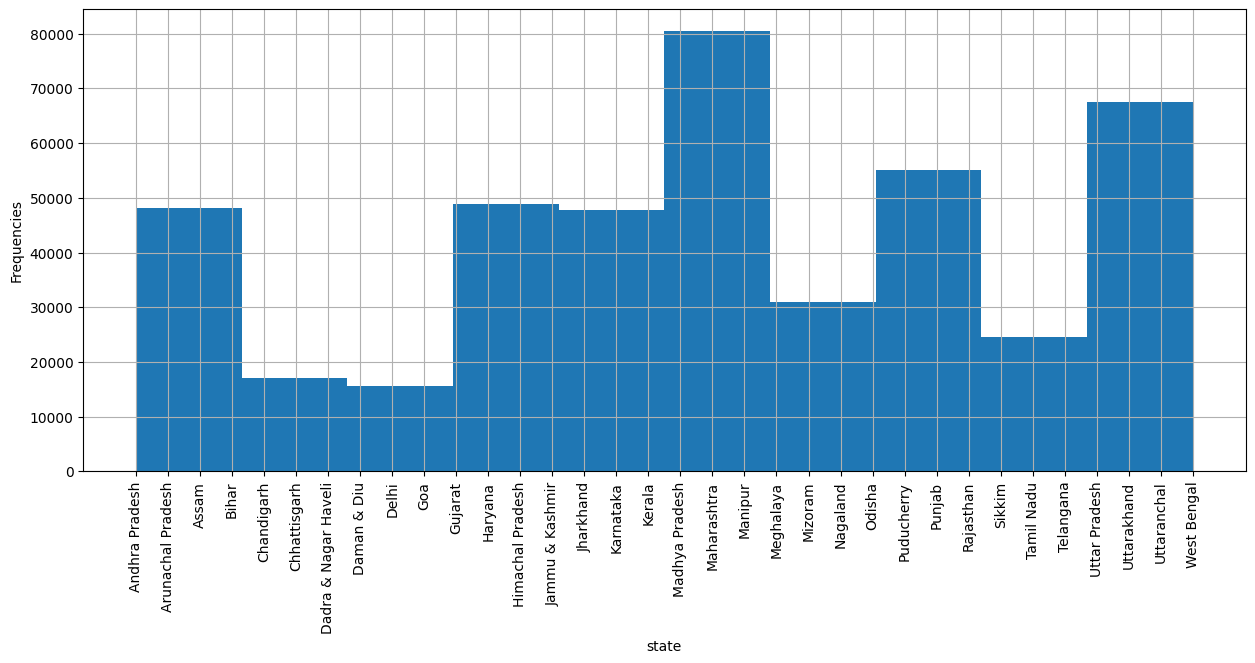

In [ ]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
dataset.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of states present in the dataset.

It was observed that most of the values are from states like Maharashtra, Madhya Pradesh, West Bengal and Uttar Pradesh. This is very useful for our analysis as these states are highly populated and contain the highest number of the industries in our country.


### Visualization of various areas from where samples are collected

<AxesSubplot: >

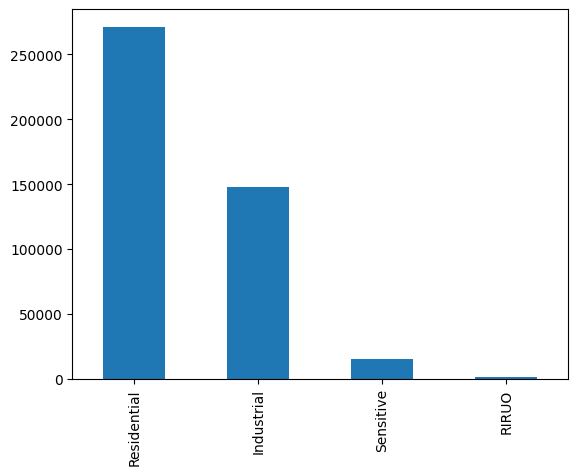

In [ ]:
dataset['type'].value_counts().plot(kind = 'bar')

Highest amount of data is observed to be collected from residential areas. This is very useful as one of the main reasons we took up this project is due to the adverse affect of air pollution on human health.

In [ ]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

dataset['AQI_Range'] = dataset['AQI'] .apply(AQI_Range)
dataset['AQI_Range'].value_counts()

Poor              264290
Moderate           53318
Unhealthy          49555
Very unhealthy     39697
Hazardous          18701
Good               10174
Name: AQI_Range, dtype: int64

<AxesSubplot: >

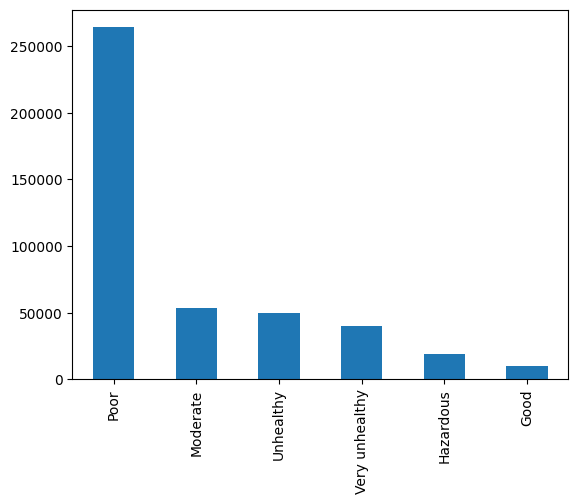

In [ ]:
dataset['AQI_Range'].value_counts().plot(kind = 'bar')

In [ ]:
dataset.describe()

,so2,no2,rspm,spm,pm2_5,si,ni,rpi,spi,pmi,AQI,year
count,435735.000000,435735.000000,435735.000000,435735.000000,435735.000000,435735.000000,435735.000000,435735.000000,435735.000000,435735.000000,435735.000000,435735.000000
mean,10.589151,25.663203,109.681193,213.189926,13.715385,13.137690,31.960774,99.176528,181.095035,13.702846,182.948899,2009.534123
std,10.863726,18.271186,72.519604,118.738547,24.601800,12.085958,21.976702,36.313824,92.023917,24.518903,90.132647,4.791559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1987.000000
25%,4.800000,14.000000,59.000000,137.000000,0.000000,6.000000,17.500000,73.750000,124.666667,0.000000,127.333333,2007.000000
50%,8.000000,21.800000,93.000000,205.255823,0.000000,10.000000,27.250000,104.333333,170.170549,0.000000,170.170549,2010.000000
75%,13.000000,32.000000,142.016832,246.000000,29.550441,16.250000,40.000000,120.672277,197.333333,29.550441,198.666667,2013.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000,313.625000,796.666667,988.379167,1086.046512,492.500000,1086.046512,2015.000000


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6920ec3-e3dd-466f-8f01-821cfb33c0ba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>